In [6]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tickers = ['VOO', 'RDBX', 'SIGA']
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 12, 31)

C:\Users\AITZAZ~1\AppData\Local\Temp/ipykernel_10204/296656646.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['return'] = np.cumprod(sma['change'])
C:\Users\AITZAZ~1\AppData\Local\Temp/ipykernel_10204/296656646.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['return'] = np.cumprod(ewm['change'])


VOO
Buy and Hold return: 1.8979121445817615
SMA return: 1.4914853845489213
EWM return: 1.9763114386416936


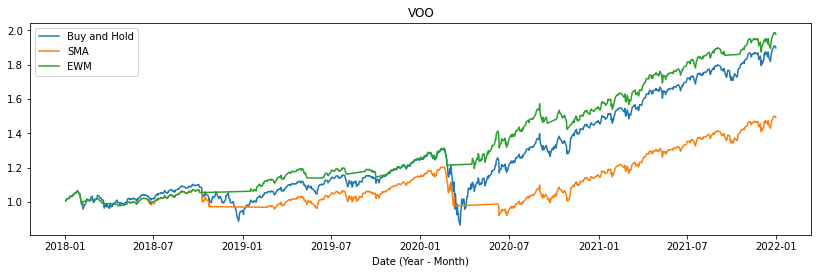

RDBX
Buy and Hold return: 0.7561224186931841
SMA return: 0.8425700854970889
EWM return: 1.2859727063753323


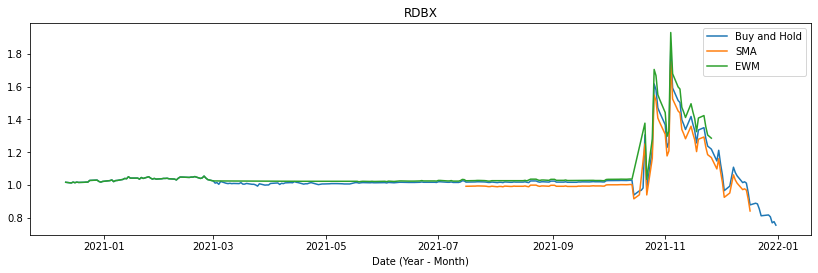

SIGA
Buy and Hold return: 1.5666666173315265
SMA return: 0.7198676057111096
EWM return: 1.7724731294389335


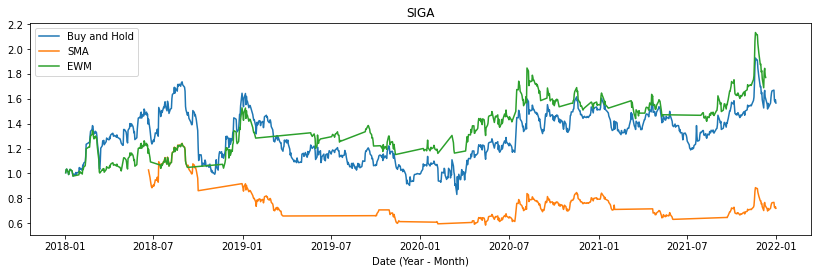

In [14]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['SMA20'] = data['Adj Close'].rolling(20).mean()
    data['SMA120'] = data['Adj Close'].rolling(120).mean()
    data['EWM12'] = data['Adj Close'].ewm(span = 12, adjust = False).mean()
    data['EWM26'] = data['Adj Close'].ewm(span = 26, adjust = False).mean()
    data['price_yesterday'] = data['Adj Close'].shift(1)
    data['change'] = data['Adj Close'] / data['price_yesterday']
    data['invested_SMA'] = np.where(data['SMA20'] > data['SMA120'], 1, 0)
    data['invested_EWM'] = np.where(data['EWM12'] > data['EWM26'], 1, 0)
    sma = data[data['invested_SMA'] == 1] 
    ewm = data[data['invested_EWM'] == 1]
    data['buy_and_hold'] = np.cumprod(data['change'])
    sma['return'] = np.cumprod(sma['change'])
    ewm['return'] = np.cumprod(ewm['change'])
    print(ticker)
    print('Buy and Hold return: ' + str(data['buy_and_hold'][-1]))
    print('SMA return: ' + str(sma['return'][-1]))
    print('EWM return: ' + str(ewm['return'][-1]))
    
    #Plotting Graphs
    plt.figure(figsize=(14, 10))
    ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan = 4, colspan = 1, title = ticker)
    ax1.plot(data['buy_and_hold'], label = 'Buy and Hold')
    ax1.plot(sma['return'], label = 'SMA')
    ax1.plot(ewm['return'], label = 'EWM')
    ax1.set_xlabel('Date (Year - Month)')
    ax1.legend(fontsize = 10)
    ax2.legend(fontsize = 10, loc = 'upper right')
    ax3.legend(fontsize = 8)
    plt.savefig('ewm.png')
    plt.show()
    